# Inspecting 3D image data with pyclesperanto
This notebook demonstrates how to navigate through 3D images.

In [1]:
import pyclesperanto_prototype as cle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Helper function for reading ImageJs ZIP file examples
import requests
import zipfile
from io import BytesIO
from tifffile import imread

def remote_reader(url):
    """generator that returns the first numpy arrays representing 
    in a tif in a remote zip."""
    response = requests.get(url)
    response.raise_for_status()
    with zipfile.ZipFile(BytesIO(response.content)) as zf:
        for path in zf.filelist:
            with zf.open(path, "r") as f:
                # f is a file-like object of type zipfile.ZipExtFile
                # replace imread with any file-reader of your choice
                # that accepts a file-like object as input 
                return imread(f)

In [2]:
# Laod example data
np_array = remote_reader('https://imagej.nih.gov/ij/images/t1-head.zip')

In [3]:
# push it to GPU memory
input_image = cle.push_zyx(np_array)

## Copy Slice
In order to visualize crop specific slices; without the image leaving GPU memory, use the `copy_slice` method. 

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


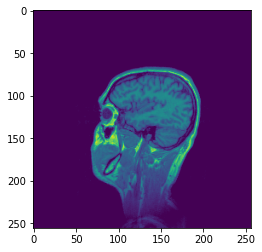

In [4]:
# Copy Slice
image_slice = cle.create([256, 256]);
slice_z_position = 40.0;
cle.copy_slice(input_image, image_slice, slice_z_position)

# show result
plt.imshow(image_slice)
plt.show()

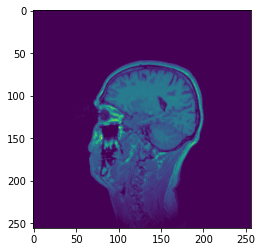

In [5]:
# Alternatively, don't hand over the output image and retrieve it
another_slice = cle.create_2d_xy(input_image)
cle.copy_slice(input_image, another_slice, slice_index = 80)

# show result
plt.imshow(another_slice)
plt.show()

## Projection
pyclesperanto offers min/mean/max and sum projections in x, y and z.

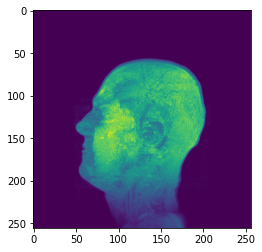

In [6]:
# Maximum Z Projection
projection = cle.maximum_z_projection(input_image)

# show result
plt.imshow(projection)
plt.show()

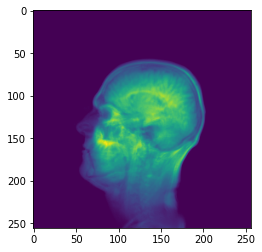

In [7]:
# Sum Z Projection
projection = cle.sum_z_projection(input_image)

# show result
cle.imshow(projection)

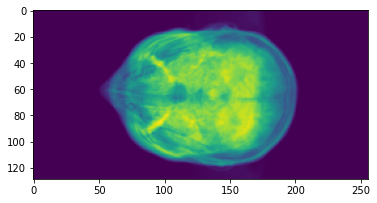

In [8]:
# Mean Y Projection
projection = cle.mean_y_projection(input_image)

# show result
cle.imshow(projection)

## Transpose XZ
In order to transpose axes of images in the GPU, use the transpose methods

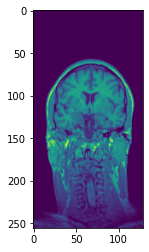

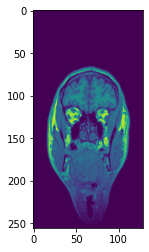

In [9]:
# Transpose X against Z
transposed_image = cle.create([256, 256, 129]);
cle.transpose_xz(input_image, transposed_image)

# show result
cle.imshow(transposed_image[126])
cle.imshow(transposed_image[98])

Use subplots to but them side by side

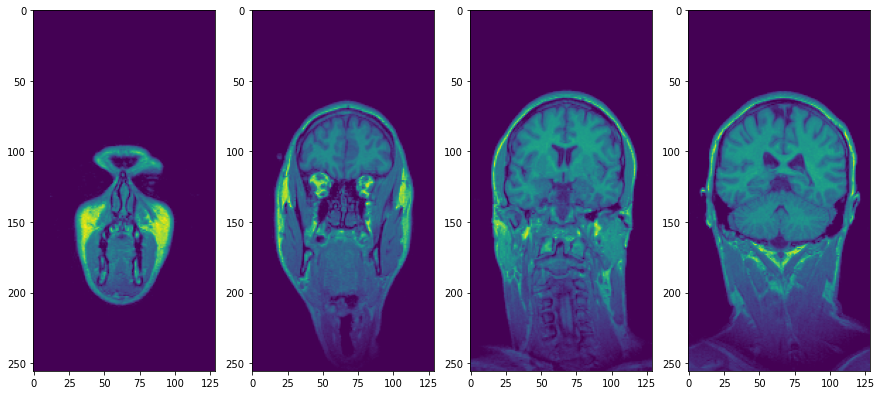

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
cle.imshow(transposed_image[75], plot=axs[0])
cle.imshow(transposed_image[100], plot=axs[1])
cle.imshow(transposed_image[125], plot=axs[2])
cle.imshow(transposed_image[150], plot=axs[3])